In [ ]:
import sys
from pathlib import Path
import joblib
ROOT = Path.cwd().parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

from src.data_loader import (
    load_splits,load_processed_data,load_model
)
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import shap
FIGURES_DIR = ROOT / "reports" / "figures"


# SHAP (SHapley Additive exPlanations)

In [87]:
# Загружаю данные
data = load_splits(scaled=False,encoded_y=True)
y_train = data["y_train"]
y_test = data["y_test"]
X_L1_train = load_processed_data("data/processed/X_train_pured(L1).csv")
X_L1_test = load_processed_data("data/processed/X_test_pured(L1).csv")

# Загружаю модель
Log_reg_12Features = load_model("log_reg_12Features.pkl")

PermutationExplainer explainer: 1001it [00:26, 23.12it/s]                         
C:\Users\AlexK\AppData\Local\Temp\ipykernel_2220\638996383.py:28: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[..., i], X_exp, show=False)


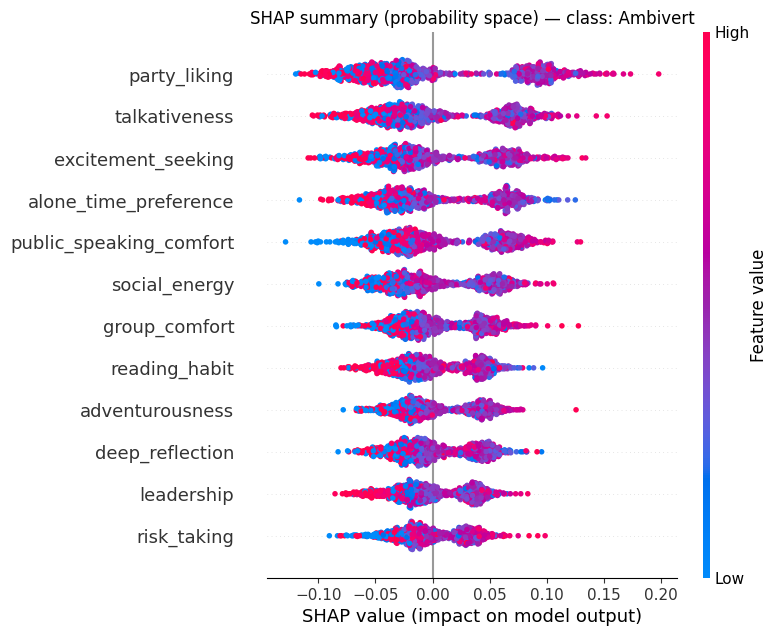

C:\Users\AlexK\AppData\Local\Temp\ipykernel_2220\638996383.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[..., i], X_exp, plot_type="bar", show=False)


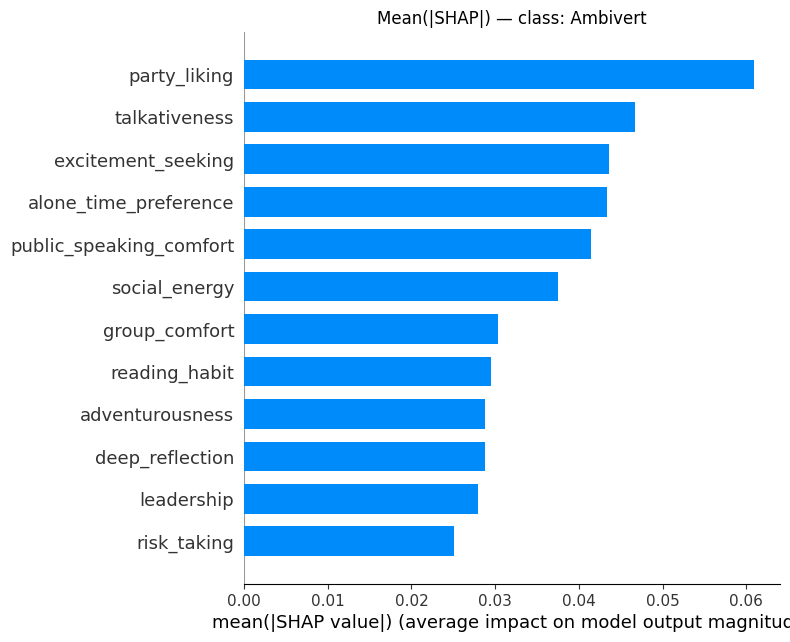

C:\Users\AlexK\AppData\Local\Temp\ipykernel_2220\638996383.py:28: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[..., i], X_exp, show=False)


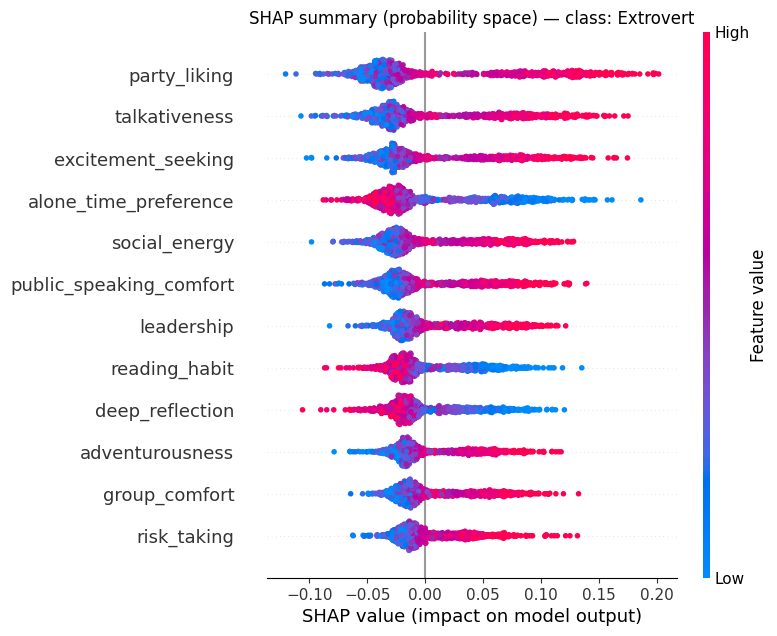

C:\Users\AlexK\AppData\Local\Temp\ipykernel_2220\638996383.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[..., i], X_exp, plot_type="bar", show=False)


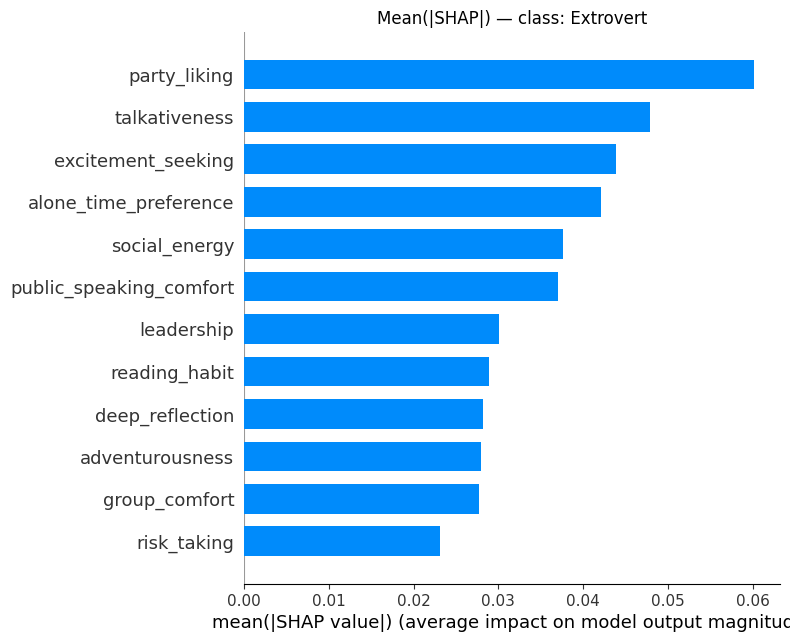

C:\Users\AlexK\AppData\Local\Temp\ipykernel_2220\638996383.py:28: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[..., i], X_exp, show=False)


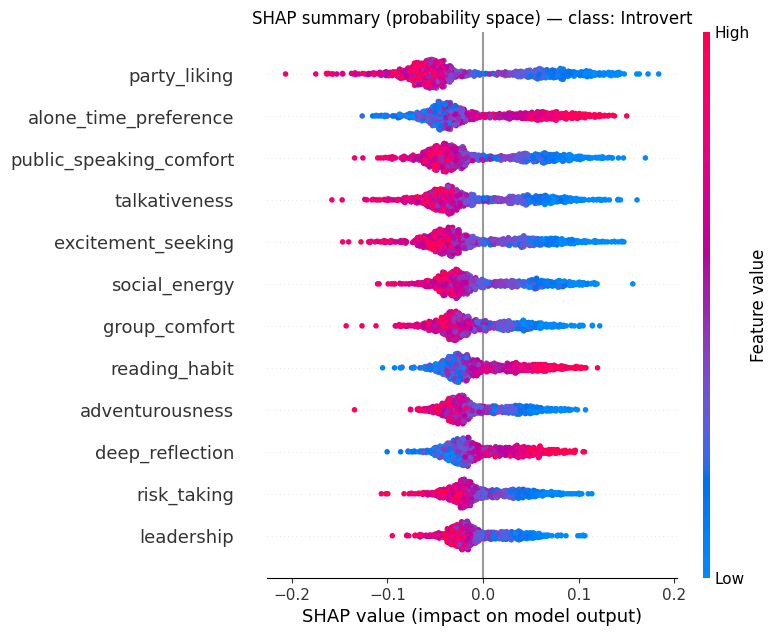

C:\Users\AlexK\AppData\Local\Temp\ipykernel_2220\638996383.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[..., i], X_exp, plot_type="bar", show=False)


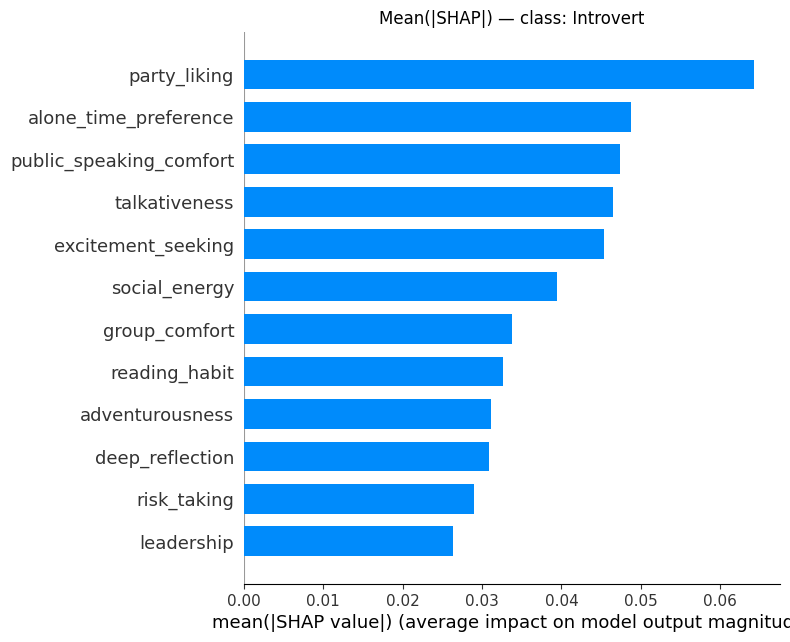

In [127]:
# SHap для 12 признаков

# Piplene модели обученной на 12 признаках
pipe2 = Log_reg_12Features

# Извлекаю модель 
clf = pipe2.named_steps["clf"]
classes = np.array(clf.classes_)


X_train = X_L1_train
X_test = X_L1_test
class_names = ['Ambivert', 'Extrovert', 'Introvert']


# Случайные выборки для увличения скорости работы
background = shap.utils.sample(X_train, min(3000, len(X_train)), random_state=42)  
X_exp = shap.utils.sample(X_test, min(1000, len(X_test)), random_state=42)

# Создаю explainer для модели
explainer = shap.Explainer(pipe2.predict_proba, background)
# Получаю SHAP значения для тестовых данных
shap_values = explainer(X_exp)

# Строю beeswarm plot для каждого класса
for i, cname in enumerate(class_names):
    plt.figure()
    shap.summary_plot(shap_values[..., i], X_exp, show=False)
    plt.title(f"SHAP summary (probability space) — class: {cname}")
    plt.savefig(FIGURES_DIR / f"SHAP_beeswarm_{cname}.png", dpi=300, bbox_inches='tight')
    plt.show()

    plt.figure()
    shap.summary_plot(shap_values[..., i], X_exp, plot_type="bar", show=False)
    plt.title(f"Mean(|SHAP|) — class: {cname}")
    plt.savefig(FIGURES_DIR / f"SHAP_bar_{cname}.png", dpi=300, bbox_inches='tight')
    plt.show()


Predicted class: 0 | name: Ambivert


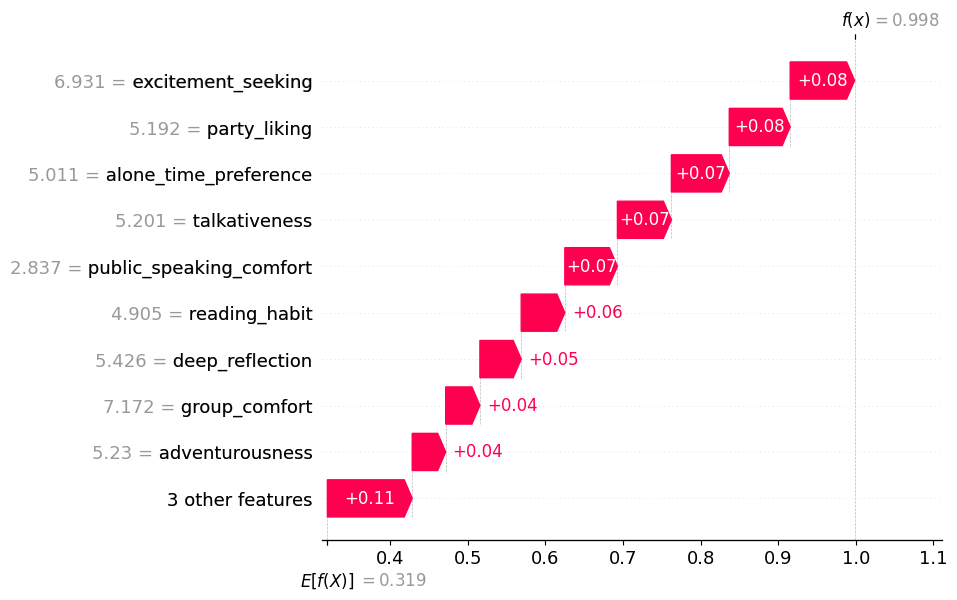

In [125]:

# Локальное объяснение одной строки (waterfall) для предсказанного класса
row_idx = 5

pred_class = pipe2.predict(X_exp.iloc[[row_idx]])[0]
class_idx = int(np.where(classes == pred_class)[0][0])

print("Predicted class:", pred_class, "| name:", class_names[class_idx])

shap.plots.waterfall(shap_values[row_idx, :, class_idx])